# Índice

1. [Exploración inicial de características](#explo)
1. [Variables de respuesta](#outcome)
   1. [Datos faltantes](#nanout)
1. [Variables independientes](#input)
   1. [Correlaciones](#corr)
   1. [Gestión de datos faltantes](#nan)
   1. [Valores atípicos](#outlier)
   1. [Reescalado de datos](#scale)
1. [Resumen](#summary)

<a id='explo'></a>

# 1.Exploración inicial de características


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
def histograms_plot(dataframe, features, rows, cols, binNum, xsize=20, ysize=20):

    fig=plt.figure(figsize=(xsize,ysize))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=binNum,ax=ax,facecolor='skyblue')
        ax.set_title(feature,color='purple')
    
    fig.tight_layout()  
    plt.show()

In [3]:
#Lectura de los datos brutos y división del dataset

rawdf = pd.read_stata('Cash_and_Childhood_Development_Replication/macoursetal_main.dta')  

df, test_df = train_test_split(rawdf, test_size=0.2, random_state=42)

In [4]:
#Lectura de las descripciones de las variables

Feat_df = pd.read_excel('assets/VarNames_Labels.xlsm', header = 1)
pd.set_option('display.max_rows', None)

Feat_df[['Variable_Name', 'Variable_Label']]

,Variable_Name,Variable_Label
0,hogarid08,Full 2008 household ID
1,cp,Person code 2008
2,hogarid_old,household ID in 2005
3,cp_old,Person code 2005
4,age_months_08,Age in months in 2008
5,hogarid06,Household ID in 2006 (first part)
6,i06,Household ID in 2006 (2nd part)
7,s4p7_parasite_i_08,Got deworming medicine in last 6 months
8,s4p39_daysbed_i_08,number of days in bed for illness in last 30 days
9,cons_food_pc_08,Per capita food expenditures 2008


Después de analizar las variables disponibles y estudiar la metodología y estructura del estudio, se realiza una selección inicial de variables basada en el conocimiento previo sobre sus potenciales efectos sobre las variables resultado (es decir, se seleccionan las variables que se consideran más implicadas en el desarrollo cognitivo de los niños).

Una vez seleccionadas, se clasifican también según el tipo de variable para facilitar la posterior exploración, siguiendo:

1. BIN:  variable categórica binaria, indistintamente codificada como una *dummy variable* o en forma de texto
1. CAT: variable categórica, generalmente en forma de texto
1. CONT: variable numérica continua
1. FREQ: variable numérica continua que expresa frecuencia (valores entre 0 y 1)
1. ID: variable generalmente numérica que codifica un identificador, por lo que se considera categórica
1. ORD: variable numérica discreta

In [5]:
Feat_df.drop(Feat_df[Feat_df.Prior_Knowledge == "-"].index,  inplace=True)
Feat_df.drop(Feat_df[Feat_df.Prior_Knowledge == "X"].index,  inplace=True)

Feat_df.drop(columns=['VarIndex', 'Base_Model', 'NaN_Management'], inplace=True)

Feat_df[['Variable_Name', 'Variable_Label', 'Type']]

,Variable_Name,Variable_Label,Type
2,hogarid_old,household ID in 2005,ID
3,cp_old,Person code 2005,ID
12,unique_05,communityid,ID
13,s1age_head_05,age for the household head at time of interview,CONT
14,s1hhsize_05,household size,ORD
15,s1hhsz_undr5_05,# people under 5 yrs in hh,ORD
16,s1hhsz_5_14_05,# people between 5 and 15 in hh,ORD
17,s1hhsz_15_24_05,# people between 15 and 25 in hh,ORD
18,s1hhsz_25_64_05,# people between 25 and 65 in hh,ORD
19,s1hhsz_65plus_05,# people 65 yrs and over in hh,ORD


Las variables de resultado (*outcome*) engloban valores de tests cognitivos, psicomotores y de desarrollo físico. El objetivo del proyecto es predecir el valor de un subconjunto, a definir, de dichos *outcomes*:

In [6]:
Feat_df.loc[(Feat_df.Prior_Knowledge == "O"), ['Variable_Name', 'Variable_Label', 'Type']]

,Variable_Name,Variable_Label,Type
51,a5sscore_i_06,TVIP standardized score,CONT
52,a6smemory_p1_06,standardize score McCarthy memory 1st part,CONT
53,a6smemory_p2_06,standardize score McCarthy memory 2nd part,CONT
54,a7a_delay_06,personal-social skills: delayed for age,BIN
56,a7b_delay_06,language skills: delayed for age,BIN
58,a7c_delay_06,fine motor skills: delayed for age,BIN
60,a7d_delay_06,gross motor skills: delayed for age,BIN
62,a9sgrossmotor_06,standardize score McCarthy gross motor,CONT
63,height_06,height for age z-score (antrop age),CONT
64,weight_06,weight for age z-score(antrop age),CONT


In [6]:
#df_out: dataframe de outcomes
df_out=df[["a5sscore_i_06","a6smemory_p1_06","a6smemory_p2_06","a7a_delay_06","a7b_delay_06",
        "a7c_delay_06","a7d_delay_06","a9sgrossmotor_06","height_06","weight_06","z_tvip_06","z_social_06",
        "z_language_06","z_finmotor_06","z_memory_06","z_grmotor_06","z_legmotor_06","z_behavior_06","z_height_06",
        "z_weight_06","z_all_06"]]

#df_in: dataframe de inputs
df_in=df[["hogarid_old","cp_old","unique_05","s1age_head_05","s1hhsize_05","s1hhsz_undr5_05","s1hhsz_5_14_05",
        "s1hhsz_15_24_05","s1hhsz_25_64_05","s1hhsz_65plus_05","s1male_head_05","s2mother_inhs_05","s3ap5_rooms_h_05",
        "s3ap23_stime_h_05","s3ap24_htime_h_05","s3ap25_hqtime_h_05","s3atoilet_hh_05","s3awater_access_hh_05",
        "s3aelectric_hh_05","s4p6_vitamina_i_05","s4p7_parasite_i_05","s11ownland_hh_05","cons_food_pc_05","cons_tot_pc_05",
        "tvip_05","height_05","a10whz_05","weight_05","itt_i","itt_all_i","yrsedfath","age_transfer","bweight",
        "s4p7_parasite_i_06","cpmom_06","T","male","TREAT1","TREAT2","TREAT3","TREAT4","ed_mom","MUN1","MUN2","MUN3","MUN4",
        "MUN5","MUN6","com_haz_05","com_waz_05","com_tvip_05","com_control_05","com_vit_05","com_deworm_05","com_notvip",
        "sample06","vitamiron_06","weighted_05","propfood_05","prstap_f_05","pranimalprot_f_05","prfruitveg_f_05"]]


<a id='outcome'></a>

# 2. Variables de respuesta

In [9]:
pd.set_option('display.max_rows', 50)
df_out

,a5sscore_i_06,a6smemory_p1_06,a6smemory_p2_06,a7a_delay_06,a7b_delay_06,a7c_delay_06,a7d_delay_06,a9sgrossmotor_06,height_06,weight_06,...,z_social_06,z_language_06,z_finmotor_06,z_memory_06,z_grmotor_06,z_legmotor_06,z_behavior_06,z_height_06,z_weight_06,z_all_06
1322,72.0,-0.888889,-0.937500,1.0,0.0,1.0,0.0,-0.750000,-0.935508,-1.171099,...,-2.181168,0.710992,-0.177515,0.428064,0.519089,0.222233,-1.904227,0.248020,-0.176402,-0.069536
999,59.0,-2.555556,-0.937500,0.0,1.0,0.0,0.0,-0.750000,-1.014521,-0.187001,...,0.718433,-0.188204,0.589500,-0.893985,0.519089,0.222233,NaN,0.182971,0.616795,0.181749
3239,59.0,-0.888889,-0.937500,1.0,1.0,0.0,0.0,0.250000,-2.277213,-1.919853,...,-0.248101,-0.188204,0.589500,0.428064,0.519089,0.884574,NaN,-0.856573,-0.779910,0.059435
2534,55.0,-2.411765,-1.555556,0.0,1.0,0.0,0.0,-0.272727,NaN,NaN,...,0.718433,0.261394,0.589500,-0.012619,0.519089,0.884574,NaN,NaN,NaN,0.472234
3790,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3092,75.0,-0.647059,-1.555556,1.0,1.0,0.0,0.0,-1.181818,NaN,NaN,...,-2.181168,0.261394,0.589500,1.309431,0.519089,0.553404,-0.727431,NaN,NaN,0.440954
3772,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



<a id='nanout'></a>

## 2.A <ins> Datos faltantes</ins>
Se investiga el número de datos faltantes (NaN) por variable para evaluar su gestión e impacto sobre la selección del subconjunto de *outcomes* a modelar. 

In [10]:
print(len(df_out[df_out.isnull().all(axis=1)].index),"individuos tienen NaN en todas las variables de resultado")

935 individuos tienen NaN en todas las variables de resultado


In [11]:
df_out.isnull().sum().sort_values() #Número de NaN por variable

z_all_06             938
a7a_delay_06         948
z_social_06          951
a7b_delay_06         960
z_language_06        963
a7c_delay_06         974
z_finmotor_06        977
a7d_delay_06         987
z_grmotor_06         990
weight_06           1123
z_weight_06         1123
z_height_06         1128
height_06           1128
a9sgrossmotor_06    2117
a6smemory_p1_06     2125
a5sscore_i_06       2128
z_legmotor_06       2129
z_memory_06         2136
z_tvip_06           2139
z_behavior_06       2313
a6smemory_p2_06     2513
dtype: int64

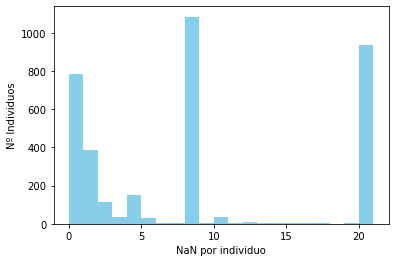

In [13]:
plt.hist(df_out.isnull().sum(axis=1), bins=21,facecolor='skyblue')
plt.ylabel('Nº Individuos')
plt.xlabel('NaN por individuo');

Según el histograma, vemos que a la mayoría les faltan 8 o 21 o 1 *outcomes*. Se estudia de qué *outcomes* se trata (celdas a continuación). 
- De los que les faltan 21, no se dispone de datos para ningún *outcome*.
- A los que les faltan 8, les faltan datos para las variables "*a5sscore_y_06*","*a6smemory_p1_06*", "*a9sgrossmotor_06*", "*z_tvip_06*", "*z_memory_06*", "*z_legmotor_06*", "*z_*behavior_06*". Es decir, no se les ha podido realizar los tests de memoria y psicomotricidad de McCarthy, el TVIP ni el test de Desarrollo Sociopersonal de Denver.
- A los que les falta una sola variable, les falta o bien la 2ª parte del test de memoria de McCarthy, o bien el test de Denver.


In [14]:
NaN_df = pd.DataFrame()

for i in [1, 8, 21]:

    new_column = "#NaN = {}".format(i) 
    NaNdata = df_out[df_out.isnull().sum(axis=1)==i].isnull().sum()
    NaN_df = NaN_df.assign(**{new_column: NaNdata})

NaN_df
                  

,#NaN = 1,#NaN = 8,#NaN = 21
a5sscore_i_06,0,1082,935
a6smemory_p1_06,0,1083,935
a6smemory_p2_06,264,1084,935
a7a_delay_06,0,0,935
a7b_delay_06,0,0,935
a7c_delay_06,0,0,935
a7d_delay_06,0,2,935
a9sgrossmotor_06,0,1084,935
height_06,0,0,935
weight_06,0,1,935



La falta de valores para estos *outcomes* está estrechamente relacionada con la edad del sujeto (histogramas de edad según #NaN = [0, 1, 8, 21])

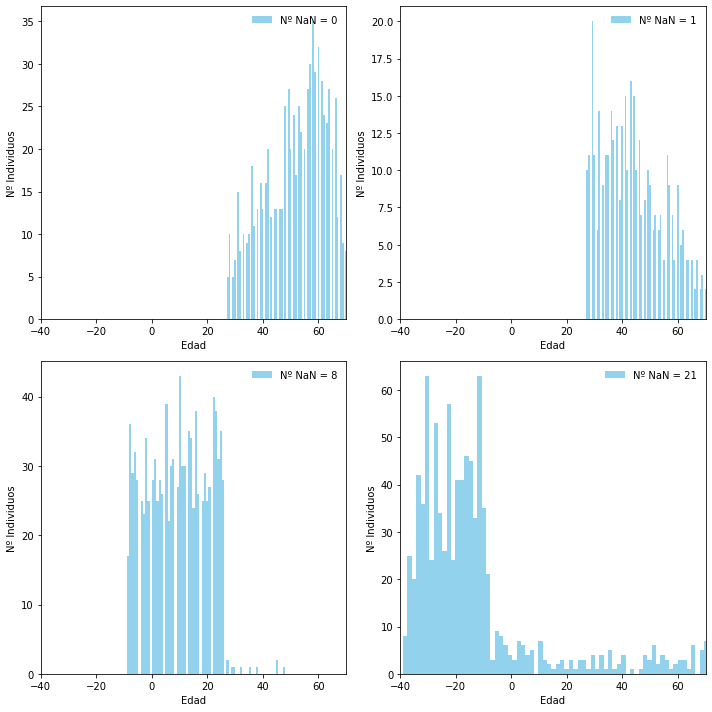

In [15]:
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

    NaN_counts = [21,0,8,1]
    
    for i in range(2):
        for j in range(2):

            ax = axes[i][j]

            n=NaN_counts[2*(j-1)+(i-1)]
            
            ax.hist(df_in[df_out.isnull().sum(axis=1)==n].age_transfer, bins=70, color='skyblue', alpha=0.9, label='Nº NaN = {}'.format(n))
            ax.set_xlabel('Edad')
            ax.set_ylabel('Nº Individuos')
            ax.set_xlim([-40, 70])
            
            leg = ax.legend(loc='upper right')
            leg.draw_frame(False)
            
    fig.tight_layout()  
    plt.show()

Teniendo en cuenta que *age_transfer* <0 significa que el individuo nació posteriormente al inicio el tratamiento, a esos individuos no se les pudo realizar ciertos tests por no alcanzar sus respectivos límites de edad. Por este motivo, se decide omitir los datos para los que nacieron más de once meses después del inicio del tratamiento (*age_transfer* < -11).

<a id='input'></a>

# 3. Variables independientes

A continuación se estudian las variables *input* para la predicción del subconjunto de *outcomes*.

<a id='corr'></a>

 ## 3.A <ins> **Correlaciones**</ins>
 
En primer lugar, se analizan posibles correlaciones entre las variables. Se calculan los coeficientes de correlación de Pearson, Spearman y Kendall para todas las parejas de variables, sin incluir variables de identificación. En la siguiente tabla se muestran las parejas con un coeficiente de correlación de Pearson superior a 0.5, coloreados en gradiente de 0.5 a 1. 

In [18]:
ID_vars= ["hogarid_old","cp_old","unique_05","cpmom_06"]

corr_coefs = ["pearson", "spearman", "kendall"]

pairedCorr_df = pd.DataFrame()

#Cálculo de coeficientes de correlación (según método) y selección de las parejas significativas

for coef in corr_coefs:

    corr_matrix = df_in.corr(method=coef).abs()

    sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                      .stack()
                      .sort_values(ascending=False))

    High_corr = sol[sol>=0.5]
    High_corr_df = pd.DataFrame(High_corr).reset_index()
    High_corr_df.columns= ["Var1","Var2",coef]

    High_corr_df.drop(High_corr_df[High_corr_df["Var1"].isin(ID_vars)].index, inplace=True)
    High_corr_df.drop(High_corr_df[High_corr_df["Var2"].isin(ID_vars)].index, inplace=True)

    if pairedCorr_df.empty:
        pairedCorr_df = High_corr_df
    else:
        pairedCorr_df = pairedCorr_df.merge(High_corr_df, on=['Var1', 'Var2'])

pairedCorr_df.style.background_gradient(cmap='coolwarm', vmin=0.5, vmax=1)

<ipython-input-18-a3fa6d282bd3>:13: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
<ipython-input-18-a3fa6d282bd3>:13: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
<ipython-input-18-a3

,Var1,Var2,pearson,spearman,kendall
0,T,TREAT1,1.000000,1.000000,1.000000
1,cons_food_pc_05,cons_tot_pc_05,0.947099,0.898204,0.743050
2,com_haz_05,com_waz_05,0.859599,0.852636,0.688391
3,height_05,weight_05,0.769145,0.764323,0.574859
4,com_vit_05,com_deworm_05,0.748542,0.741587,0.567223
5,s1hhsize_05,s1hhsz_5_14_05,0.709948,0.708250,0.594938
6,a10whz_05,weight_05,0.698819,0.710291,0.527276
7,age_transfer,sample06,0.652513,0.636053,0.521833
8,s1hhsize_05,s1hhsz_25_64_05,0.648654,0.625960,0.527960
9,s3ap24_htime_h_05,s3ap25_hqtime_h_05,0.634812,0.631976,0.542691


De estas correlaciones:

   - *TREAT1 - T*: por definición, quién no es tratado con la aportación económica básica, es un control.
    
   - *cons_tot_pc_05 - cons_food_pc_05*: el gasto absoluto *per capita* y el gasto en comida tienen una correlación directa.
      
   - *com_waz_05 - com_haz_05*: los valores medios por comunidad para la estatura según la edad y el peso según la edad se correlacionan de forma evidente por el crecimiento natural de los niños.
    
   - *weight_05 - height_05*: de la misma manera, los valores absolutos de peso y estatura también se correlaciones.
   
   - *com_vit_05 - com_deworm_05*: esta correlación podría darse porque en una comunidad en la que se han administrado vitaminas a los niños es probable que también tengan acceso a fármacos antihelmínticos.
   
De estas relaciones, se decide sólo tener en cuenta la presencia del tratamiento base (T1), por lo que no se usarán las variables *TREAT1*, *TREAT2*, *TREAT3* ni *TREAT4*.

<a id='nan'></a>
## 3.B <ins> **Gestión de datos faltantes**</ins>

Analizando la distribución de datos faltantes por individuo en las variables de entrada:

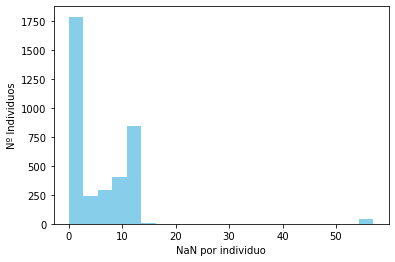

In [19]:
plt.hist(df_in.isnull().sum(axis=1), bins=21,facecolor='skyblue')
plt.ylabel('Nº Individuos')
plt.xlabel('NaN por individuo');

Observamos que hay algunas personas a las que les faltan un número importante de características. Se decide eliminar dichos registros por falta de datos.

Para el resto de registros, se analizará la distribución de datos faltantes para proponer estrategias de imputación y/u omisión.

In [10]:
nan_rows=df_in[df_in.isnull().sum(axis=1)>=0.8*len(df_in.columns)].index
df_in.drop(nan_rows, inplace=True)

Feat_w_NaN = ["prfruitveg_f_05","prstap_f_05","pranimalprot_f_05","s2mother_inhs_05","propfood_05","cons_food_pc_05","ed_mom","vitamiron_06","s4p7_parasite_i_06","cpmom_06","yrsedfath","bweight","cp_old","weighted_05","s4p7_parasite_i_05","s4p6_vitamina_i_05","weight_05","height_05","a10whz_05","tvip_05"]



NaN_df= pd.DataFrame({'Variable_Name':df_in.isna().sum().index, '#NaN':df_in.isna().sum().values})

merge= Feat_df.merge(NaN_df, on=['Variable_Name'])
merge=merge[merge["Variable_Name"].isin(Feat_w_NaN)].sort_values('#NaN')
merge.drop(columns=['Type', 'Prior_Knowledge'])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,VarIndex,Variable_Name,Variable_Label,Base_Model,NaN_Management,#NaN
61,181,prfruitveg_f_05,% fruit and vegetables in total food expenditures,NaN,HouseMean,14
59,179,prstap_f_05,% staples in total food expenditures,NaN,HouseMean,14
60,180,pranimalprot_f_05,% animal proteins in total food expenditures,NaN,HouseMean,14
11,22,s2mother_inhs_05,mother of this person lives in the household,NaN,HouseMode,101
58,178,propfood_05,% food in total expenditures,NaN,HouseMean,101
22,33,cons_food_pc_05,annual pc total food consumption,NaN,HouseMean,101
41,74,ed_mom,Number of years of education mother at baseline,X,HouseMode,200
30,41,yrsedfath,Years of education of father,NaN,HouseMean,362
33,50,s4p7_parasite_i_06,Got deworming medicine in last 6 months,X,HouseMode,906
56,120,vitamiron_06,Got vitamin or iron in last 6 months,NaN,HouseMode,906


La presencia de tantos datos faltantes puede ser debida, como se ha observado en los *outcomes*, a la edad de los sujetos. Al realizar la omisión de los registros para los que *age_transfer*<-11, se resuelve una cantidad considerable de conflictos:

In [11]:
AgeDrop_rows=df_in[df_in.age_transfer<-11].index

df_inDrop=df_in.drop(AgeDrop_rows)

Feat_w_NaN = df_inDrop.isna().sum()[df_inDrop.isna().sum()>0].sort_values().axes
Feat_w_NaN= Feat_w_NaN[0].tolist()

NaN_df= pd.DataFrame({'Variable_Name':df_inDrop.isna().sum().index, '#NaN AgeDrop':df_inDrop.isna().sum().values})

merge= merge.merge(NaN_df, on=['Variable_Name'])
merge= merge[merge["Variable_Name"].isin(Feat_w_NaN)].sort_values('#NaN AgeDrop')
merge.drop(columns=['Type', 'Prior_Knowledge'])

,VarIndex,Variable_Name,Variable_Label,Base_Model,NaN_Management,#NaN,#NaN AgeDrop
0,181,prfruitveg_f_05,% fruit and vegetables in total food expenditures,NaN,HouseMean,14,10
1,179,prstap_f_05,% staples in total food expenditures,NaN,HouseMean,14,10
2,180,pranimalprot_f_05,% animal proteins in total food expenditures,NaN,HouseMean,14,10
3,22,s2mother_inhs_05,mother of this person lives in the household,NaN,HouseMode,101,101
4,178,propfood_05,% food in total expenditures,NaN,HouseMean,101,101
5,33,cons_food_pc_05,annual pc total food consumption,NaN,HouseMean,101,101
6,74,ed_mom,Number of years of education mother at baseline,X,HouseMode,200,200
8,50,s4p7_parasite_i_06,Got deworming medicine in last 6 months,X,HouseMode,906,253
9,120,vitamiron_06,Got vitamin or iron in last 6 months,NaN,HouseMode,906,253
10,67,cpmom_06,Person code mother 2006,NaN,NaN,938,285


Analizando el sentido de estas variables, se propone la siguiente estrategia de imputación:

- Ciertas variables corresponden a información que potencialmente pertenece a toda la unidad familiar (como los años de educación de la madre), por lo que se hipotetiza que en otros registros que pertenezcan a la misma unidad familiar (según el identificador *hogarid_old*) aparecerá la información faltante. De esta manera, se podrán imputar según la media o la moda (para variables cuantitativas y categóricas, respectivamente) dentro de la misma unidad familiar.

<ins>    -  **Imputación por unidad familiar**</ins>


Para comprobar que la imputación de datos faltantes según la unidad familiar es una estrategia adecuada, se crea un *dataframe* que consolida los datos para las variables en estudio por NaN según el código de la unidad familiar (*hogarid_old*).

De estos datos se busca que dentro de una misma unidad familiar se cuente con el mismo valor para cada variable. A modo ilustrativo, si en una unidad familiar de tres hijos se cuenta con los siguientes datos para el porcentaje de gastos en alimentos [ 56%, 56%, NaN ] (*propfood_05*), se puede deducir que el valor faltante también corresponderá a 56%.

In [20]:
def byhousehold_df(dfI, hh_feat_to_impute):
    household_df= pd.DataFrame({"Household_ID": dfI.hogarid_old.unique()})
    
    for feat in hh_feat_to_impute:
        household_df[feat]=[dfI[dfI.hogarid_old==familia][feat].values for familia in dfI.hogarid_old.unique()]
    
    return household_df.copy()


In [21]:
feats_hh_impute = ["prfruitveg_f_05",
                   "prstap_f_05",
                   "pranimalprot_f_05",
                   "s2mother_inhs_05",
                   "propfood_05",
                   "cons_food_pc_05",
                   "ed_mom",
                   "yrsedfath",
                   "vitamiron_06",
                  ]
hh_df = byhousehold_df(df_in, feats_hh_impute)
hh_df

,Household_ID,prfruitveg_f_05,prstap_f_05,pranimalprot_f_05,s2mother_inhs_05,propfood_05,cons_food_pc_05,ed_mom,yrsedfath,vitamiron_06
0,70210702,[0.0],[0.48979592],[0.0],[1.0],[0.5681103],[1698.6666],[5.0],[4.0],[1.0]
1,70171401,"[0.061189964, 0.061189964]","[0.5629154, 0.5629154]","[0.17274626, 0.17274626]","[nan, 1.0]","[nan, 0.42263696]","[nan, 3093.5]","[3.0, nan]","[nan, nan]","[1.0, nan]"
2,70453801,"[0.049967192, 0.049967192]","[0.6805628, 0.6805628]","[0.025699802, 0.025699802]","[1.0, 1.0]","[0.68532395, 0.68532395]","[1587.3572, 1587.3572]","[0.0, 0.0]","[6.0, 6.0]","[1.0, 1.0]"
3,70358201,[0.019273534],[0.8793551],[0.026686434],[1.0],[0.83459544],[2358.4],[2.0],[6.0],[1.0]
4,70417201,[0.0],[0.8562507],[0.062452067],[1.0],[0.90670687],[3281.75],[2.0],[1.0],[nan]
...,...,...,...,...,...,...,...,...,...,...
2213,70252301,[0.061578948],[0.70736843],[0.039473683],[1.0],[0.40506786],[2250.0],[0.0],[6.0],[1.0]
2214,70066101,[0.15117115],[0.57748777],[0.1527149],[1.0],[0.73596084],[1211.4375],[8.0],[6.0],[1.0]
2215,70406501,[0.051007155],[0.36629766],[0.45735833],[1.0],[0.5491891],[5233.1],[5.0],[0.0],[1.0]
2216,70431801,[0.0],[0.5777778],[0.15],[1.0],[0.5642407],[1370.0],[5.0],[4.0],[1.0]


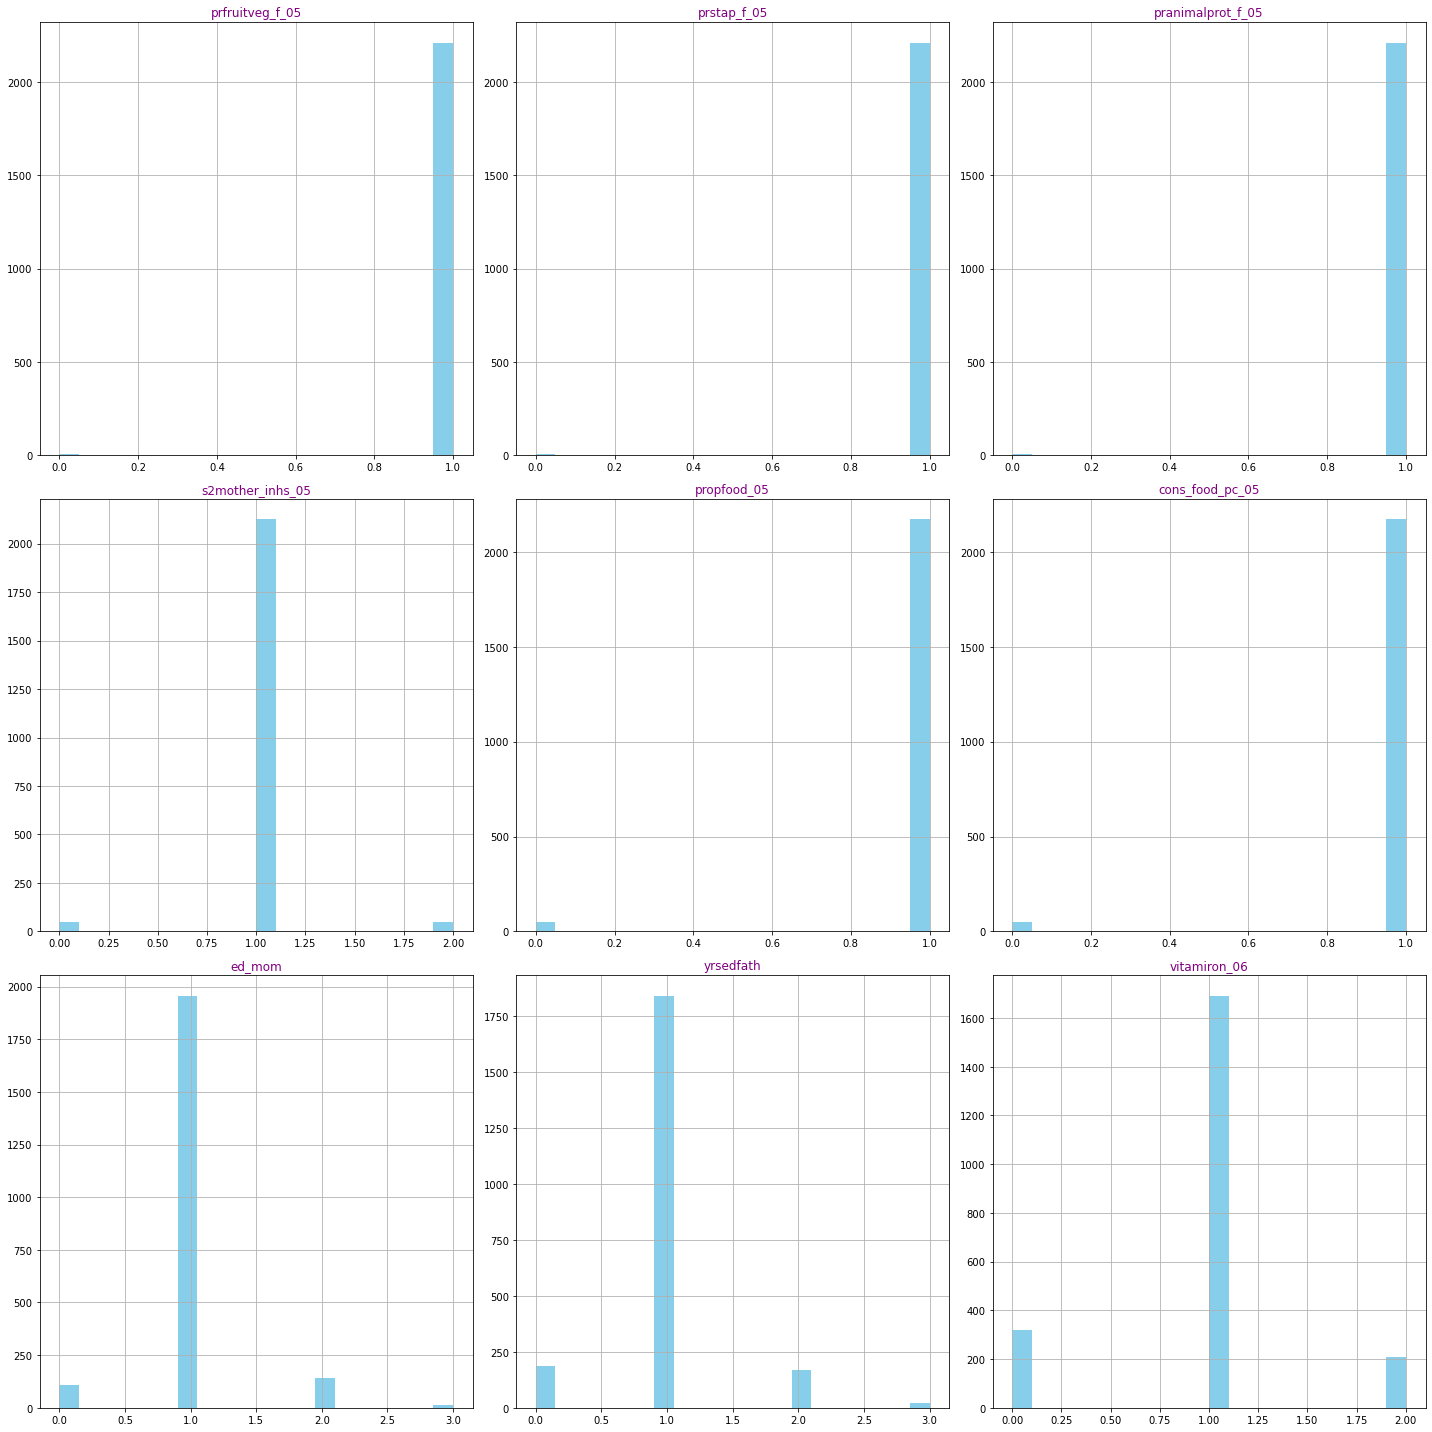

In [22]:
hh_df_unique = pd.DataFrame(hh_df["Household_ID"])

for feat in feats_hh_impute:
    hh_df_unique[feat]=[len(np.unique(hh_df[feat][i][~np.isnan(hh_df[feat][i])])) for i in range(len(hh_df[feat]))]

histograms_plot(hh_df_unique,hh_df_unique.columns[hh_df_unique.columns!='Household_ID'],3,3,20)

Los histogramas muestran que, para la gran mayoría de variables y unidades familiares, la imputación es correcta. Así pues, se decide implementar esta estrategia para resolver los datos faltantes para estas variables.


Para resolver el resto de datos faltantes se decide realizar una imputación según la media para las variables contínuas (CONT y ORD) y según la mediana/moda para las variables discretas (CAT y BIN). Además, se realizará una codificación simple en una variable *dummy* de las características discretas que no estén ya almacenadas como tal.

<a id='outlier'></a>

## 3.C <ins>    **Valores atípicos**</ins>

Una vez resueltos los valores faltantes, se decide eliminar registros que pudieran considerarse atípicos. Para ello, se establece un límite de ±3 veces el rango intercuartílico. En las siguientes gráficas se muestran las variables cuantitativas a las que se les aplica esta estrategia.

In [12]:
def histograms_plot_IQR(dataframe, features, rows, cols, binNum, xsize=20, ysize=20):

    fig=plt.figure(figsize=(xsize,ysize))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=binNum,ax=ax,facecolor='skyblue')
        ax.set_title(feature,color='purple')
        
        q3 = np.nanpercentile(dataframe[feature], 75)
        q1 = np.nanpercentile(dataframe[feature], 25)
        iqr = q3 - q1
        out_low = q1 - 3*iqr
        out_high = q3 + 3*iqr
        
        xmin, xmax = ax.get_xlim()

        if (out_high<xmax):
            ax.axvspan(out_high, xmax, facecolor='orange', alpha=0.1)

        if (out_low>xmin):
            ax.axvspan(xmin, out_low, facecolor='orange', alpha=0.1)

        
        for bar in ax.containers[0]:
            x = bar.get_x() + 0.5 * bar.get_width()

            if x < out_low:
                bar.set_color('orange')
            elif x <= out_high:
                bar.set_color('skyblue')
            else:
                bar.set_color('orange')

    fig.tight_layout()  
    plt.show()

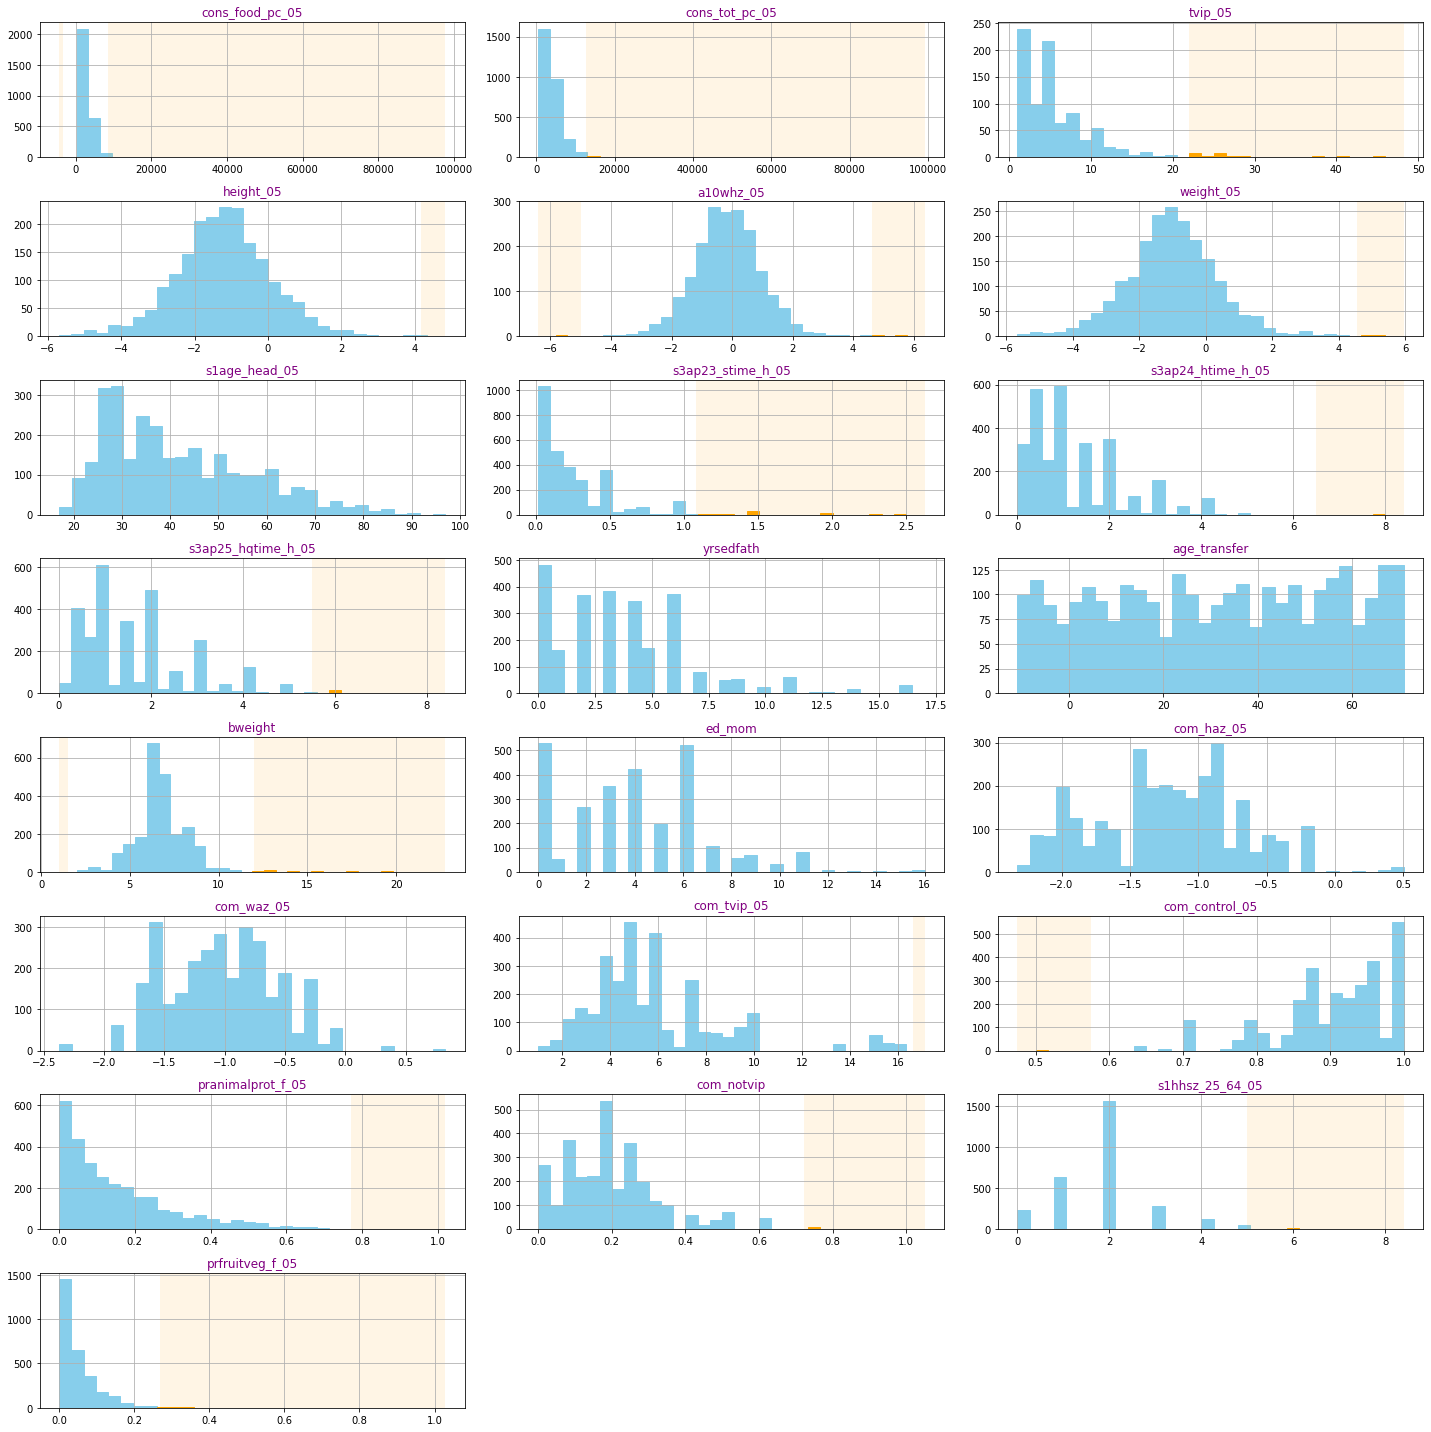

In [13]:
outlier_cols = ["cons_food_pc_05","cons_tot_pc_05","tvip_05","height_05","a10whz_05","weight_05","s1age_head_05",
                "s3ap23_stime_h_05","s3ap24_htime_h_05","s3ap25_hqtime_h_05","yrsedfath","age_transfer","bweight",
                "ed_mom","com_haz_05","com_waz_05","com_tvip_05","com_control_05","pranimalprot_f_05","com_notvip",
                "s1hhsz_25_64_05","prfruitveg_f_05"]

histograms_plot_IQR(df_inDrop, outlier_cols, 8, 3, 30)


Evaluando los resultados de esta estrategia, se decide limitar las variables sobre las que se aplicará para evitar la pérdida de demasiada información. Las variables de las que omitirán los valores atípicos son las siguientes:

In [11]:
outlier_vars = ["cons_food_pc_05","cons_tot_pc_05","s3ap24_htime_h_05","bweight","com_control_05","pranimalprot_f_05","prfruitveg_f_05"]

Feat_df.loc[Feat_df['Variable_Name'].isin(outlier_vars), ['Variable_Name', 'Variable_Label']]

,Variable_Name,Variable_Label
24,s3ap24_htime_h_05,"time to health center, hrs"
32,cons_food_pc_05,annual pc total food consumption
33,cons_tot_pc_05,pc consumption aggregate
43,bweight,Birth weight
83,com_control_05,Community average baseline weight controls
179,pranimalprot_f_05,% animal proteins in total food expenditures
180,prfruitveg_f_05,% fruit and vegetables in total food expenditures


<a id='scale'></a>

## 3.D <ins>    **Reescalado de datos**</ins>

Finalmente, para evitar posibles errores al aplicar modelos predictivos como una regresión lineal, por ejemplo, se decide realizar un reescalado de los datos. Para ello, se busca si las variables de interés siguen una distribución normal.

Las variables *height_05*, *a10whz_05* y *weight_05* corresponden a Z-scores sobre la muestra y se les realizará una estandarización.

In [22]:
from scipy.stats import shapiro
from scipy.stats import normaltest

def TestNormal_features(dataframe, features, method="shapiro"):
    normalTest_df = pd.DataFrame()
    normalTest_df["Variables"]= features
    normalTest_df["Statistic"]=""
    normalTest_df["p-value"]=""
    for i, feature in enumerate(features):
        a=dataframe[feature].dropna()
        
        if method == "shapiro":
            stat, p = shapiro(a)
        elif method == "normal":
            stat, p = normaltest(a)

        normalTest_df["Statistic"][i] = stat
        normalTest_df["p-value"][i] = p
        
    return normalTest_df.copy()

In [24]:
to_testN = ["s1age_head_05","s3ap23_stime_h_05","s3ap24_htime_h_05","s3ap25_hqtime_h_05","cons_food_pc_05","cons_tot_pc_05","tvip_05","yrsedfath","age_transfer","bweight","ed_mom","com_haz_05","com_waz_05","com_tvip_05","com_control_05"]

shap=TestNormal_features(df_inDrop, to_testN, "shapiro")
shap.rename(columns = {'Statistic':'Shapiro Statistic', 'p-value':'Shapiro p-value'}, inplace = True)

NormalTests = shap.merge(TestNormal_features(df_inDrop, to_testN, "normal"), on = "Variables")
NormalTests.rename(columns = {'Statistic':'D Agostino Statistic', 'p-value':'D Agostino p-value'}, inplace = True)
NormalTests

,Variables,Shapiro Statistic,Shapiro p-value,D Agostino Statistic,D Agostino p-value
0,s1age_head_05,0.93824,0.0,225.60008,0.0
1,s3ap23_stime_h_05,0.749929,0.0,1583.466645,0.0
2,s3ap24_htime_h_05,0.886848,0.0,577.220902,0.0
3,s3ap25_hqtime_h_05,0.88273,0.0,650.538942,0.0
4,cons_food_pc_05,0.352068,0.0,5031.650546,0.0
5,cons_tot_pc_05,0.50696,0.0,4312.438251,0.0
6,tvip_05,0.708213,0.0,583.303291,0.0
7,yrsedfath,0.891864,0.0,564.95871,0.0
8,age_transfer,0.950673,0.0,3065.694166,0.0
9,bweight,0.881424,0.0,1057.29613,0.0


En vista de los resultados del test de K<sup>2</sup> de D’Agostino y el test Shapiro-Wilk, ninguna variable sigue una distribución normal. Únicamente *com_waz_05* podría discutirse dado el p-valor significativo (&alpha;=0.05) de su test D'Agostino, sin embargo, se considerará como una variable no normal. 

En conclusión, se realizará una normalización para la mayoría de variables contínuas.

<a id='summary'></a>

# 4. Resumen

Después de la exploración de los datos, se ha realizado una selección de variables en función de conocimiento previo, valores faltantes, etc. así como se ha establecido una estrategia de limpieza de datos que se implementará en una *pipeline*. A continuación se muestra un resumen gráfico de dicho proceso:

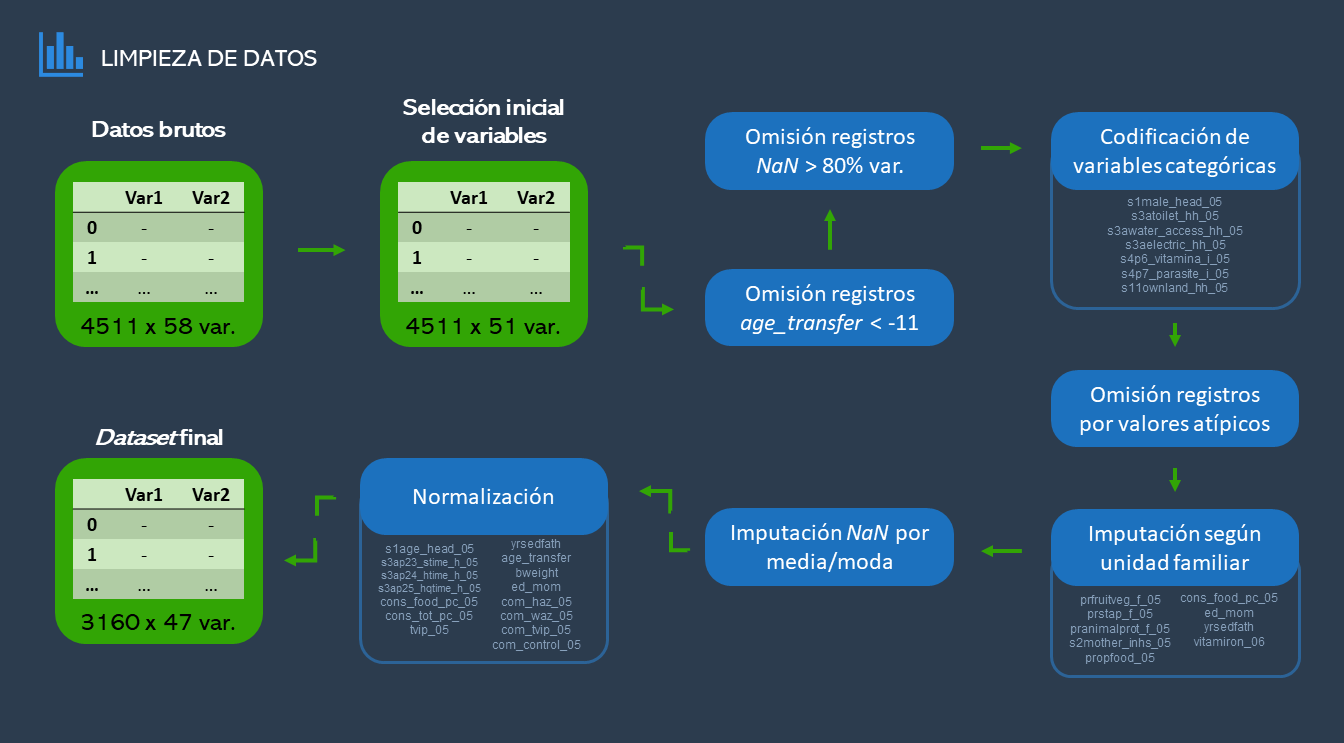